In [1]:
import cx_Oracle
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [130]:
#df = pd.read_sql_query(sql_st, con=conn)
df = pd.read_excel('C:/Users/fauziah/Desktop/Data_ML_FLength.xlsx')
df = df.dropna()
print(df)
print(df.columns)

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


       RECV_PIECE_ID  RECV_GREEN_LENGTH  PI_MEASLENGTH_MM  FIN_LENGTH_IN_MM  \
0       301231192250               2648              2600              2591   
1       301231192181               2661              2593              2589   
2       301231192242               2651              2589              2584   
3       301231192243               2655              2596              2591   
4       301231192184               2648              2609              2597   
...              ...                ...               ...               ...   
15786   301201155814               3039              2999              2962   
15787   301201155836               3042              3013              2962   
15788   301201155866               3031              2982              2947   
15790   301201155742               3045              3001              2972   
15791   301201155741               3044              2993              2962   

       GREEN_DIAMETER  FIN_LENGTH_OUT_MM     FIN_TI

In [131]:
print(df.describe())

       RECV_PIECE_ID  RECV_GREEN_LENGTH  PI_MEASLENGTH_MM  FIN_LENGTH_IN_MM  \
count   1.382200e+04       13822.000000      13822.000000      13822.000000   
mean    3.012167e+11        2939.453842       2886.290551       2858.221459   
std     8.632719e+06         192.721897        190.748684        188.179792   
min     3.011711e+11        2047.000000       1988.000000       1952.000000   
25%     3.012112e+11        2903.000000       2847.000000       2822.000000   
50%     3.012112e+11        3032.000000       2968.000000       2937.000000   
75%     3.012212e+11        3040.000000       2990.000000       2962.000000   
max     3.012312e+11        3615.000000       3593.000000       3545.000000   

       GREEN_DIAMETER  FIN_LENGTH_OUT_MM  BAKESHRINKAGE  GRAPHSHRINKAGE  \
count     13822.00000       13822.000000   13822.000000    13822.000000   
mean        709.07135        2779.654609      53.163290       28.069093   
std         116.64791         187.461553      13.593418       1

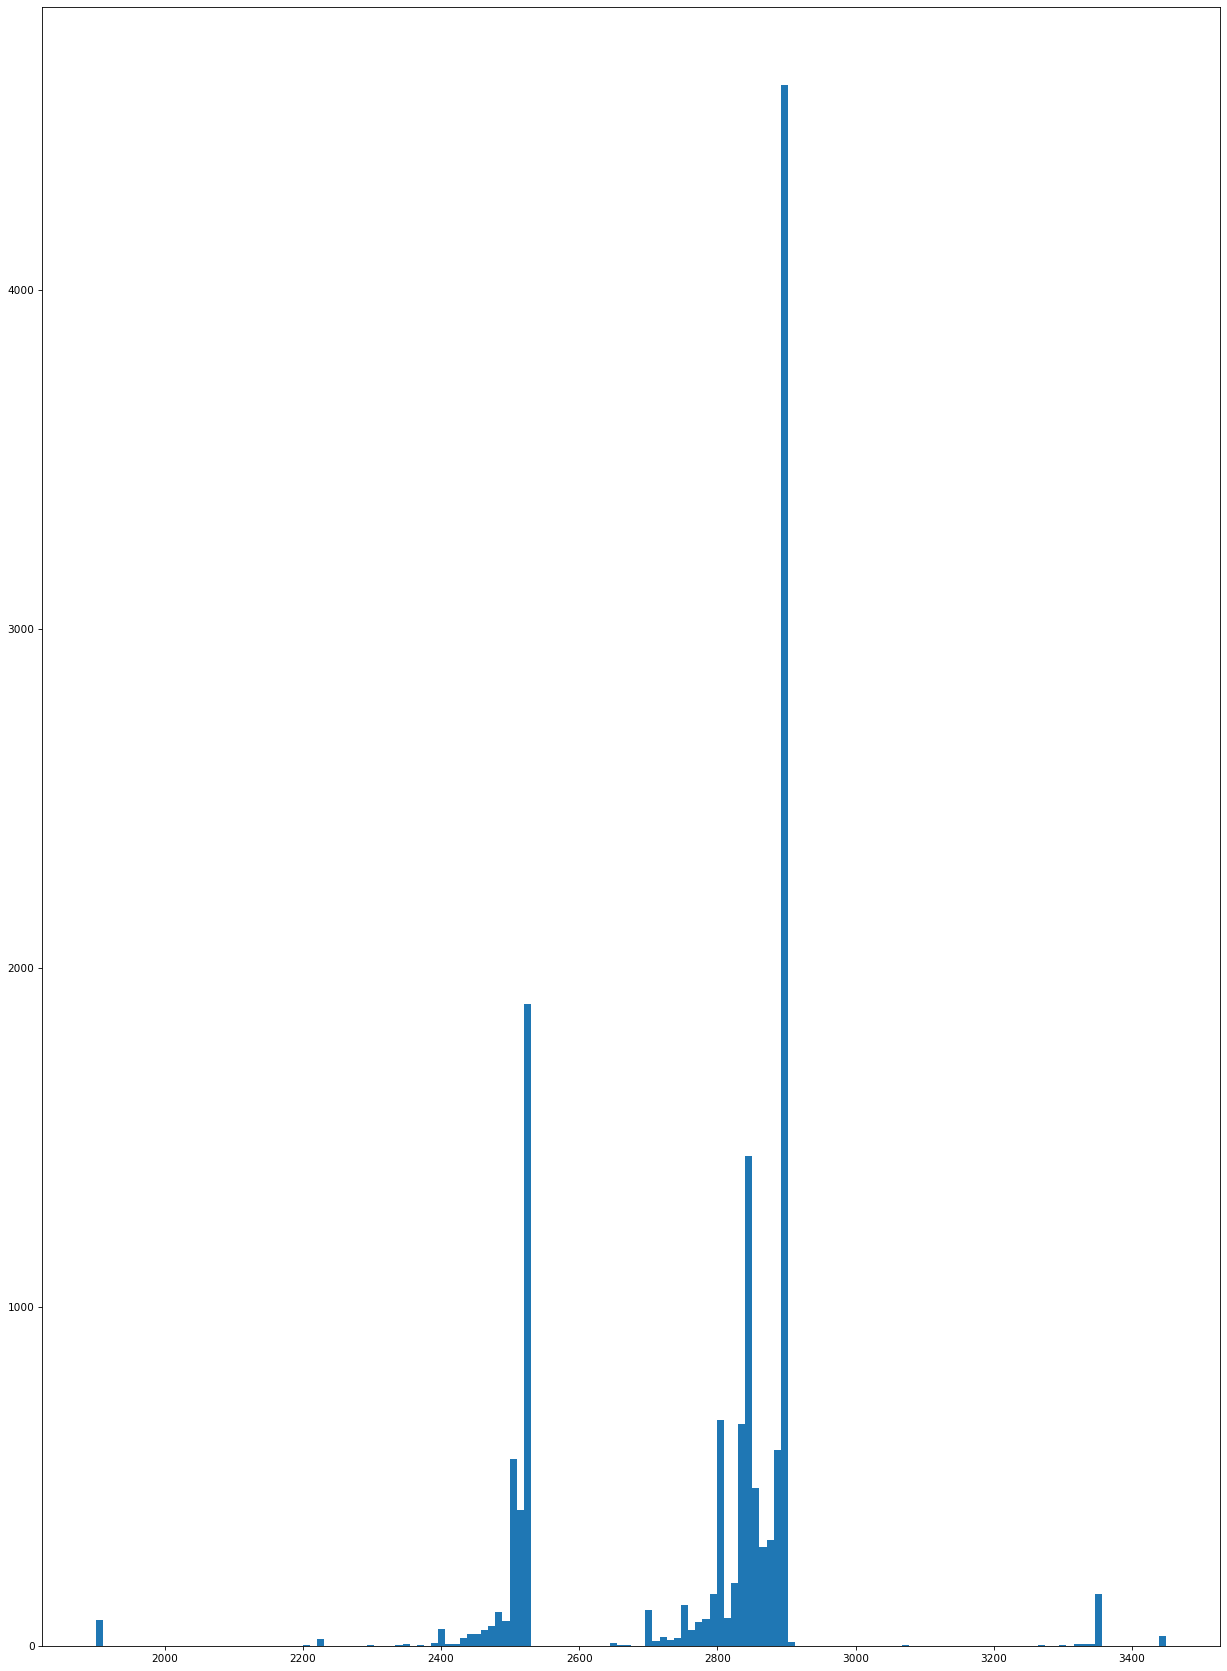

In [89]:
import numpy
import matplotlib.pyplot as plt


plt.hist(df['FIN_LENGTH_OUT_MM'], 150)
plt.show()

In [132]:
import matplotlib.pyplot as plt
df2 = df[['RECV_GREEN_LENGTH', 'PI_MEASLENGTH_MM', 'FIN_LENGTH_IN_MM', 'GREEN_DIAMETER', 'FIN_LENGTH_OUT_MM']]
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,RECV_GREEN_LENGTH,PI_MEASLENGTH_MM,FIN_LENGTH_IN_MM,GREEN_DIAMETER,FIN_LENGTH_OUT_MM
RECV_GREEN_LENGTH,1.000000,0.997540,0.996652,0.469175,0.969631
PI_MEASLENGTH_MM,0.997540,1.000000,0.997731,0.464816,0.970105
FIN_LENGTH_IN_MM,0.996652,0.997731,1.000000,0.464777,0.971848
GREEN_DIAMETER,0.469175,0.464816,0.464777,1.000000,0.470632
FIN_LENGTH_OUT_MM,0.969631,0.970105,0.971848,0.470632,1.000000


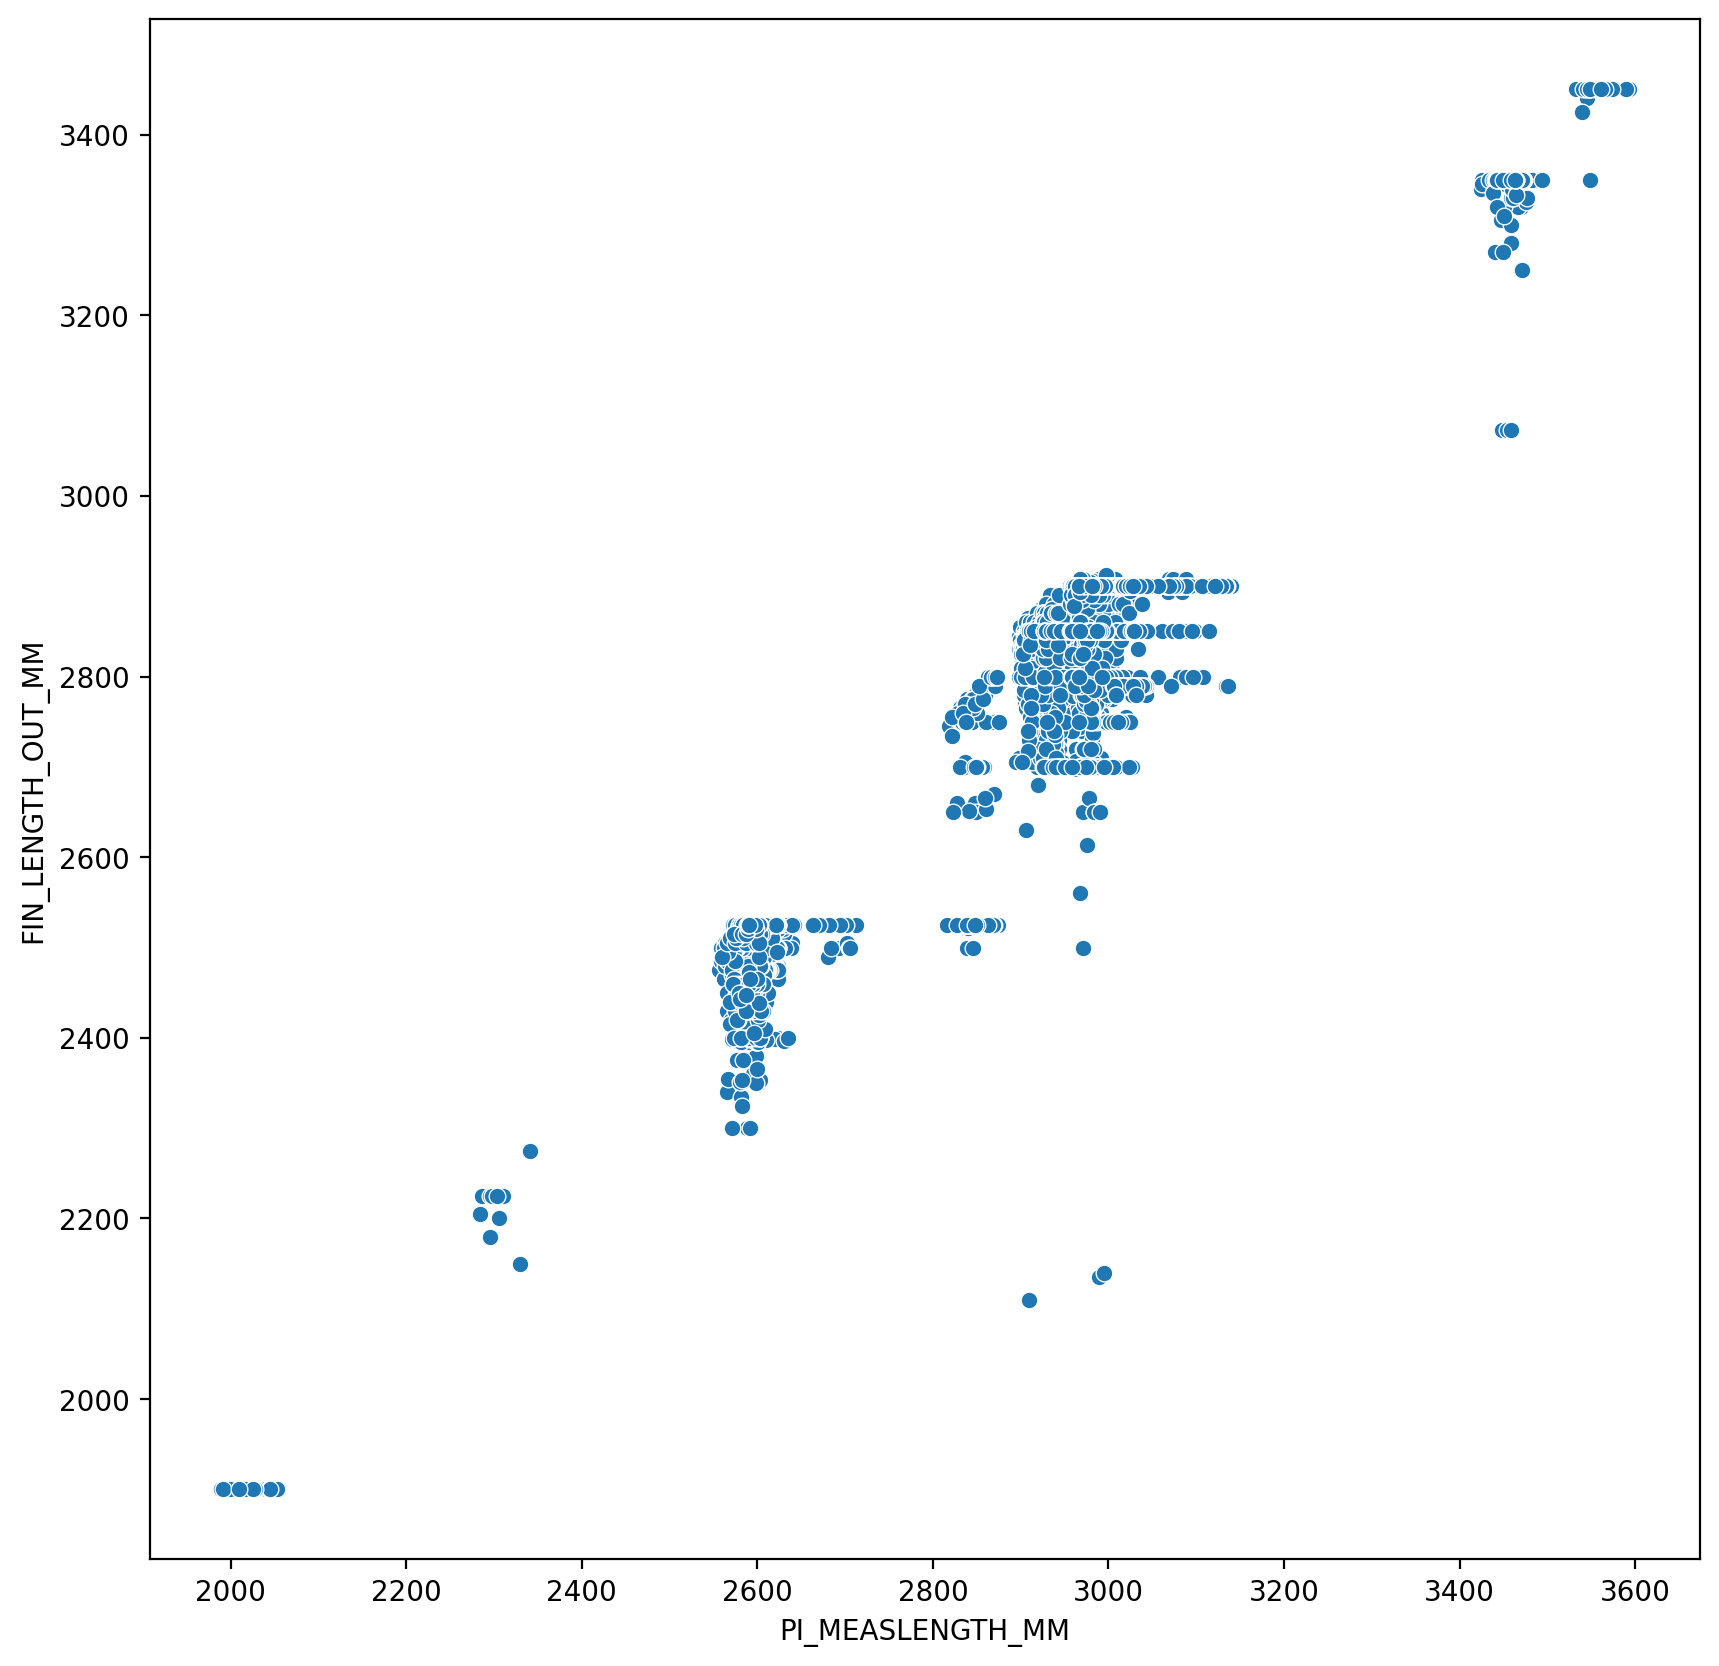

In [48]:
import seaborn as sns
sns.scatterplot(x='PI_MEASLENGTH_MM',y='FIN_LENGTH_OUT_MM', data=df);

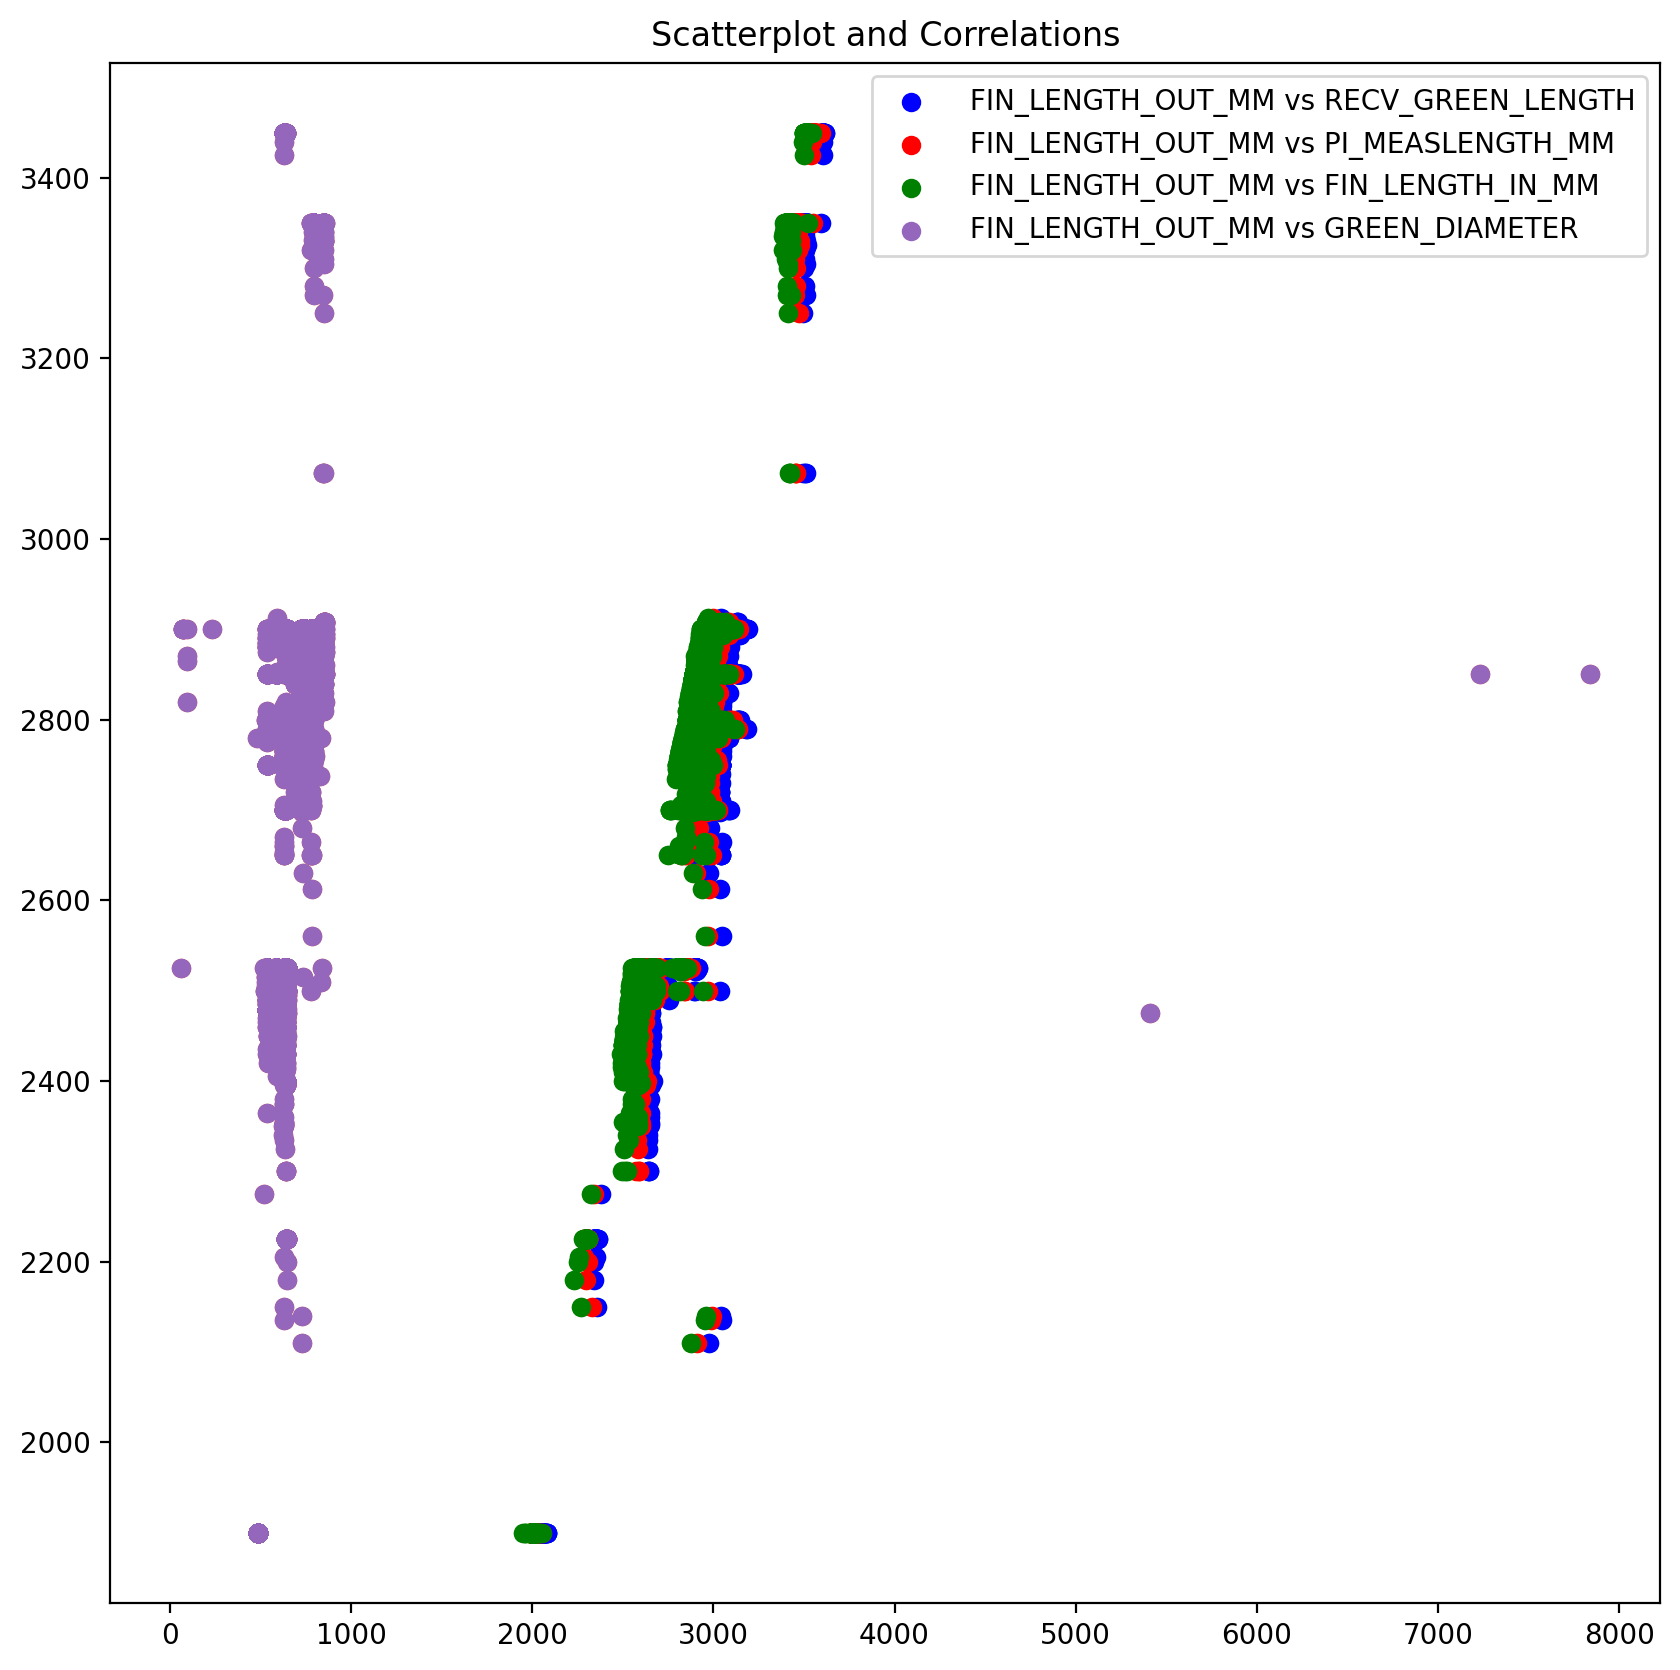

In [47]:

# Plot
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':200})
plt.scatter(df['RECV_GREEN_LENGTH'], df['FIN_LENGTH_OUT_MM'])
plt.scatter(df['PI_MEASLENGTH_MM'], df['FIN_LENGTH_OUT_MM'])
plt.scatter(df[ 'FIN_LENGTH_IN_MM'], df['FIN_LENGTH_OUT_MM'])
plt.scatter(df[ 'GREEN_DIAMETER'], df['FIN_LENGTH_OUT_MM'])

plt.scatter(df['RECV_GREEN_LENGTH'],  df['FIN_LENGTH_OUT_MM'], label=f' FIN_LENGTH_OUT_MM vs RECV_GREEN_LENGTH',color='blue')
plt.scatter(df['PI_MEASLENGTH_MM'],  df['FIN_LENGTH_OUT_MM'], label=f' FIN_LENGTH_OUT_MM vs PI_MEASLENGTH_MM',color='red')
plt.scatter(df[ 'FIN_LENGTH_IN_MM'],  df['FIN_LENGTH_OUT_MM'], label=f' FIN_LENGTH_OUT_MM vs FIN_LENGTH_IN_MM', color='green')
plt.scatter(df[ 'GREEN_DIAMETER'],  df['FIN_LENGTH_OUT_MM'], label=f' FIN_LENGTH_OUT_MM vs GREEN_DIAMETER')
#plt.scatter(x, y3, label=f'y3 Correlation = {np.round(np.corrcoef(x,y3)[0,1], 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


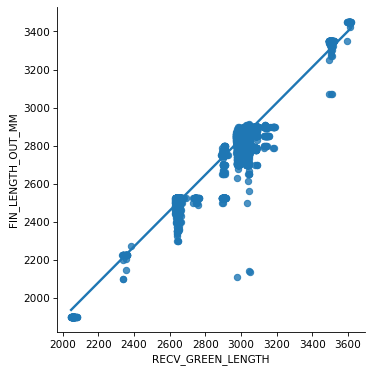

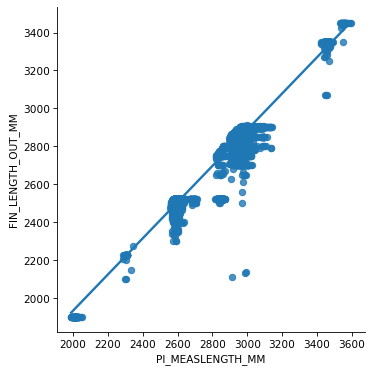

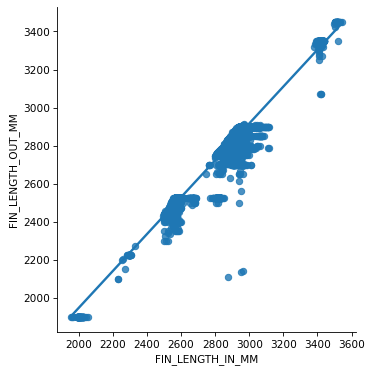

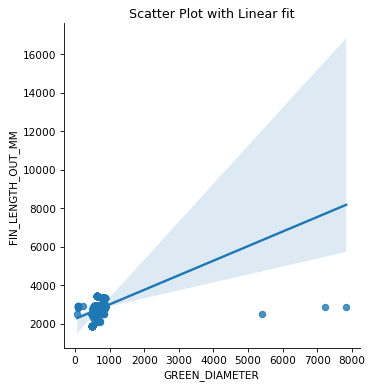

In [133]:
import seaborn as sns

plt.rcParams.update({'figure.figsize':(20,28), 'figure.dpi':76})
sns.lmplot(x = 'RECV_GREEN_LENGTH', y = 'FIN_LENGTH_OUT_MM', data=df, fit_reg = True)
sns.lmplot(x = 'PI_MEASLENGTH_MM', y = 'FIN_LENGTH_OUT_MM', data=df, fit_reg = True)
sns.lmplot(x = 'FIN_LENGTH_IN_MM', y = 'FIN_LENGTH_OUT_MM', data=df, fit_reg = True)
sns.lmplot(x = 'GREEN_DIAMETER', y = 'FIN_LENGTH_OUT_MM', data=df, fit_reg = True)
plt.title("Scatter Plot with Linear fit");

In [134]:
X = df[['RECV_GREEN_LENGTH', 'PI_MEASLENGTH_MM', 'FIN_LENGTH_IN_MM', 'GREEN_DIAMETER']]

y = df['FIN_LENGTH_OUT_MM']


In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
ridge_model = Ridge(alpha=1.0) 


In [137]:
# Train the models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge()

In [138]:
# Make predictions
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
ridge_prediction = ridge_model.predict(X_test)

# MSE
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
ridge_mse = mean_squared_error(y_test, ridge_prediction)

# RMSE
linear_rmse = np.sqrt(linear_mse)
random_forest_rmse = np.sqrt(random_forest_mse)
ridge_regression_rmse = np.sqrt(ridge_mse)

# R2
linear_r2 = r2_score(y_test, linear_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
ridge_r2 = r2_score(y_test, ridge_prediction)

In [139]:
# Create a DataFrame to compare the results
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Ridge_Regression'],
                        'RMSE' : [linear_rmse, random_forest_rmse, ridge_regression_rmse ],
                        'MSE': [linear_mse, random_forest_mse, ridge_mse ],
                        'R^2': [linear_r2, random_forest_r2, ridge_r2]})

print(results)

               Model       RMSE          MSE       R^2
0  Linear Regression  44.294495  1962.002250  0.945384
1      Random Forest  36.368984  1322.703031  0.963180
2   Ridge_Regression  44.294494  1962.002229  0.945384


In [56]:
### Eliminate not significant variable ####

X = df[['RECV_GREEN_LENGTH', 'PI_MEASLENGTH_MM', 'FIN_LENGTH_IN_MM', 'GREEN_DIAMETER']]

y = df['FIN_LENGTH_OUT_MM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
ridge_model = Ridge(alpha=1.0) 


# Train the models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
ridge_prediction = ridge_model.predict(X_test)

# MSE
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
ridge_mse = mean_squared_error(y_test, ridge_prediction)

# RMSE
linear_rmse = np.sqrt(linear_mse)
random_forest_rmse = np.sqrt(random_forest_mse)
ridge_regression_rmse = np.sqrt(ridge_mse)

# R2
linear_r2 = r2_score(y_test, linear_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
ridge_r2 = r2_score(y_test, ridge_prediction)

# Create a DataFrame to compare the results
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Ridge_Regression'],
                        'RMSE' : [linear_rmse, random_forest_rmse, ridge_regression_rmse ],
                        'MSE': [linear_mse, random_forest_mse, ridge_mse ],
                        'R^2': [linear_r2, random_forest_r2, ridge_r2]})

print(results)

               Model       RMSE          MSE       R^2
0  Linear Regression  43.232060  1869.011025  0.949017
1      Random Forest  40.406937  1632.720564  0.955463
2   Ridge_Regression  43.232060  1869.011014  0.949017


In [68]:
# Test using whole data

X2_test = df[['RECV_GREEN_LENGTH', 'PI_MEASLENGTH_MM', 'FIN_LENGTH_IN_MM', 'GREEN_DIAMETER']]
y2_test = df['FIN_LENGTH_OUT_MM']


# Make predictions
linear_predictions = linear_model.predict(X2_test)
random_forest_predictions = random_forest_model.predict(X2_test)
ridge_prediction = ridge_model.predict(X2_test)

# MSE
linear_mse = mean_squared_error(y2_test, linear_predictions)
random_forest_mse = mean_squared_error(y2_test, random_forest_predictions)
ridge_mse = mean_squared_error(y2_test, ridge_prediction)

# RMSE
linear_rmse = np.sqrt(linear_mse)
random_forest_rmse = np.sqrt(random_forest_mse)
ridge_regression_rmse = np.sqrt(ridge_mse)

# R2
linear_r2 = r2_score(y2_test, linear_predictions)
random_forest_r2 = r2_score(y2_test, random_forest_predictions)
ridge_r2 = r2_score(y2_test, ridge_prediction)

# Create a DataFrame to compare the results
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Ridge_Regression'],
                        'RMSE' : [linear_rmse, random_forest_rmse, ridge_regression_rmse ],
                        'MSE': [linear_mse, random_forest_mse, ridge_mse ],
                        'R^2': [linear_r2, random_forest_r2, ridge_r2]})

print(results)

               Model       RMSE          MSE       R^2
0  Linear Regression  44.081562  1943.184146  0.944714
1      Random Forest  21.072785   444.062249  0.987366
2   Ridge_Regression  44.081562  1943.184144  0.944714


In [9]:
#using GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
boosted_boston = GradientBoostingRegressor(n_estimators = 500, 
                                           learning_rate = 0.01, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1)

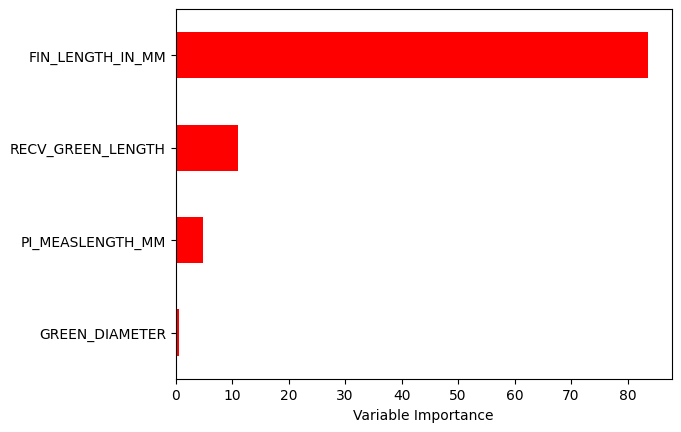

In [10]:
## Let's check out the feature importances again:

feature_importance = boosted_boston.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

In [11]:
mean_squared_error(y_test, boosted_boston.predict(X_test))

1216.960103599775

In [12]:
boosted_boston2 = GradientBoostingRegressor(n_estimators = 500, 
                                            learning_rate = 0.2, 
                                            max_depth = 4, 
                                            random_state = 1)
boosted_boston2.fit(X_train, y_train)

mean_squared_error(y_test, boosted_boston2.predict(X_test))

### try to find the best learning rate=alpha by using cv

1477.0171263392945